In [10]:
%matplotlib widget
import bmcs_utils.api as bu
from bmcs_cross_section.api import ReinfLayer
from bmcs_shear.shear_crack.crack_tip_orientation import CrackStateAnimator
#from bmcs_shear.shear_crack.crack_extension import CrackStateAnimator
ce = CrackStateAnimator()
ce.sz_bd.cmm.trait_set(tau_1 = 4, s_1 = 0.2, tau_2 = 3, tau_3 = 2, s_2 = 1.4, s_3 = 5)
x_00=250
ce.sz_cp.trait_set(x_00=x_00, n_m = 15)
ce.sz_bd.Rectangle = True
ce.sz_bd.trait_set(H=300, B=200, L=500)
ce.sz_cp.add_x_tip_an([x_00-10, 50]) 
ce.sz_cp.add_x_tip_an([x_00-30, 100]) 

bl1 = ReinfLayer(name='layer1', z=44, A=ce.sz_bd.smm.A_f, matmod='steel')
bl1.matmod_.trait_set(E=ce.sz_bd.smm.E_f, f_t=ce.sz_bd.smm.sig_y)
ce.sz_bd.cross_section_layout.add_layer(bl1)
ce.sz_bd
ce.sz_cp.sz_ctr.w = 10
#ce.sz_bd.cross_section_layout.reinforcement[0].trait_set(z=20, A=1, E=1)

In [11]:
ce.interact()

<lambdifygenerated-34>:2: RuntimeWarning: overflow encountered in exp
  return (select([less(f_c, -35.7142857142857*d_a**(-0.32)*f_c**(-0.18)*f_t**2*w),less_equal(w, 0.028*d_a**0.32*f_c**0.18/f_t),True], [-f_c,35.7142857142857*d_a**(-0.32)*f_c**(-0.18)*f_t**2*w,f_t*exp(-35.7142857142857*d_a**(-0.32)*f_c**(-0.18)*f_t*(-0.028*d_a**0.32*f_c**0.18/f_t + w))], default=nan))
<lambdifygenerated-35>:2: RuntimeWarning: invalid value encountered in sqrt
  return (select([less_equal(w, 0),True], [0,0.25*f_c*s*(-sqrt(2)*sqrt(w/d_a) + 1)*((2.44 - 39.04/f_c)*abs(s/w)**3 + 9.8/f_c)/(w*(s**4*(2.44 - 39.04/f_c)/w**4 + 1))], default=nan))


In [12]:
%%capture
import numpy as np
import matplotlib.pylab as plt
from matplotlib import animation, rc

fig = plt.figure(figsize=(13,6))
fig.canvas.header_visible = False

psi_range = np.linspace(0, np.pi/4, 15)
psi_range = np.hstack([psi_range, psi_range[-1:0:-1]])

ce.sz_cp.sz_ctr.x_rot_1k = 200

x_rot_1k = ce.sz_cp.sz_ctr.x_rot_1k

w_range = np.linspace(0, 40, 15)
w_range = np.hstack([w_range, w_range[-1:0:-1]])


def plot_crack_path(i):
    ce.psi_slider = psi_range[i]
    #ce.x_rot_1k_slider = x_rot_1k
    ce.w_slider = w_range[i]
    fig.clf()
    axes = ce.sz_cp.subplots(fig)
    ce.sz_cp.update_plot(axes)
    axes.set_ylim(ymin=-10, ymax=320)
    axes.set_xlim(xmin = 295, xmax=296)
    

def plot_crack_tip_rotation(i):
    ce.psi_slider = psi_range[i]
    #ce.x_rot_1k_slider = x_rot_1k
    ce.w_slider = w_range[i]
    fig.clf()
    axes = ce.sz_cp.sz_ctr.subplots(fig)
    ce.sz_cp.sz_ctr.update_plot(axes)
    axes.set_xlim(xmin=50, xmax=350)
    

def plot_stress_state(i):
    ce.psi_slider = psi_range[i]
    fig.clf()
    axes = ce.sz_stress_profile.subplots(fig)
    ce.sz_stress_profile.update_plot(axes)
    ax_u_0, ax_w_0, ax_S_0, ax_F_0, ax_u_1, ax_w_1, ax_S_1, ax_F_1 = axes
    
    
def plot_deformed_state(i):
    ce.psi_slider = psi_range[i]
    ce.x_rot_1k_slider = x_rot_1k
    fig.clf()
    axes = ce.sz_stress_profile.ds.subplots(fig)
    ce.sz_stress_profile.ds.update_plot(axes)
    axes.set_ylim(ymin=-10, ymax=340)
    axes.set_xlim(xmin = 295, xmax=296)

In [13]:
def html5_crack_path_video():
    n_t = len(psi_range)
    # call the animator. blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, plot_crack_path,
                                   frames=n_t, interval=100, blit=True)
    return anim.to_html5_video()


def html5_crack_tip_rotation_video():
    n_t = len(psi_range)
    # call the animator. blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, plot_crack_tip_rotation,
                                   frames=n_t, interval=100, blit=True)
    return anim.to_html5_video()

def html5_stress_state_video():
    n_t = len(psi_range)
    # call the animator. blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, plot_stress_state,
                                   frames=n_t, interval=150, blit=True)
    return anim.to_html5_video()

def html5_deformed_state_video():
    n_t = len(psi_range)
    # call the animator. blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, plot_deformed_state,
                                   frames=n_t, interval=100, blit=True)
    return anim.to_html5_video()

In [14]:
import os.path
home_dir = os.path.expanduser('~')
anim_dir = os.path.join(home_dir, 'generated_animation')
if not os.path.exists(anim_dir):
    os.makedirs(anim_dir)

In [15]:
%%capture
crack_path_anim_file = os.path.join(anim_dir, 'crack_path.html')
with open(crack_path_anim_file,'w') as html_video_file:
    html_video_file.write(html5_crack_path_video())

In [16]:
%%capture
crack_tip_rotation_anim_file = os.path.join(anim_dir, 'crack_tip_rotation.html')
with open(crack_tip_rotation_anim_file,'w') as html_video_file:
    html_video_file.write(html5_crack_tip_rotation_video())

In [17]:
%%capture
stress_anim_file = os.path.join(anim_dir, 'stress_state_animation.html')
with open(stress_anim_file,'w') as html_video_file:
    html_video_file.write(html5_stress_state_video())

In [18]:
%%capture
deformed_anim_file = os.path.join(anim_dir, 'deformed_state_animation.html')
with open(deformed_anim_file,'w') as html_video_file:
    html_video_file.write(html5_deformed_state_video())

In [20]:
from IPython.display import HTML
html_video_file = open(stress_anim_file,'r')
HTML(html_video_file.read())

In [38]:
# from IPython.display import HTML
# html_video_file = open(crack_tip_rotation_anim_file,'r')
# HTML(html_video_file.read())

In [12]:
from IPython.display import HTML
html_video_file = open(crack_path_anim_file,'r')
HTML(html_video_file.read())

In [35]:
%matplotlib widget
import matplotlib.pylab as plt
import numpy as np
from matplotlib import animation, rc
from bmcs_shear.shear_crack.crack_propagation import CrackPropagation
from bmcs_cross_section.api import ReinfLayer



ce = CrackPropagation(n_seg=140)
ce.sz_bd.Rectangle = True
ce.sz_bd.trait_set(H=600, B=250, L=3870)
ce.sz_cp.trait_set(x_00=ce.sz_bd.L * 0.5, n_m = 4)
ce.sz_cp.sz_ctr.L_fps = 80
ce.sz_cp.sz_ctr.trait_set(ell = 2)

bl1 = ReinfLayer(name='layer1', z=44, A=ce.sz_bd.smm.A_f, matmod='steel')
bl1.matmod_.trait_set(E=ce.sz_bd.smm.E_f, f_t=ce.sz_bd.smm.sig_y)
ce.sz_bd.cross_section_layout.add_layer(bl1)
ce.sz_bd

In [36]:
ce.run()
ce.interact()

<lambdifygenerated-34>:2: RuntimeWarning: invalid value encountered in sqrt
  return (select([less_equal(w, 0),True], [0,0.25*f_c*s*(-sqrt(2)*sqrt(w/d_a) + 1)*((2.44 - 39.04/f_c)*abs(s/w)**3 + 9.8/f_c)/(w*(s**4*(2.44 - 39.04/f_c)/w**4 + 1))], default=nan))


In [37]:
%%capture
fig, (ax, ax_F) = plt.subplots(1,2, figsize = (8, 3), tight_layout = True)
ds = ce.crack_tip_orientation.crack_tip_shear_stress.sz_stress_profile.ds
sz_cp =ce.sz_cp
x_n_a =sz_cp.x_t_Ia[0,:]
x_Ia = sz_cp.x_t_Ia
n_extend = 10
F_beam = np.array(ce.F_beam) / 1000
v_beam = np.array(ce.v_n)
v_beam = np.hstack([v_beam, v_beam[-1]*np.ones((n_extend,))])
F_beam = np.hstack([F_beam, F_beam[-1]*np.ones((n_extend,))])
x_Ia = np.vstack([x_Ia, x_Ia[-1,:]*np.ones((n_extend,2))])

ds.plot_sz_fill(ax)
ax_F.set_xlim(xmax = 1.04 * np.max(v_beam))
ax_F.set_ylim(ymax = 1.04 * np.max(F_beam))
v_n = v_beam[0]
F_n = F_beam[0]

def plot_crack_step(i):
    global x_n_a, v_n, F_n
    x_n1_a = sz_cp.x_t_Ia[i,:]
    ax.plot([x_n_a[0], x_n1_a[0]], [x_n_a[1], x_n1_a[1]], '-', color = 'black')
    ax.set_ylim(ymin=0 ,ymax=600)
    ax.set_xlim(xmin=0 ,xmax=3870)
    ax.set_xlabel('Length of beam [mm]')
    ax.set_ylabel('Height of beam [mm]')
    ax.set_title('Crack propagation')
    ax.axis('equal');
    x_n_a = x_n1_a
    v_n1, F_n1 = v_beam[i], F_beam[i]
    ax_F.plot([v_n, v_n1], [F_n, F_n1], 'o-', color = 'blue')
    ax_F.set_xlabel('Deflection [mm]')
    ax_F.set_ylabel('Load [kN]')
    ax_F.set_title('Load deflection curve')
    v_n, F_n = v_n1, F_n1

In [38]:
# import matplotlib.pylab as plt
# fig, ax = plt.subplots(1,1, figsize = (10, 4))
# sz_cp.plot_sz0(ax)

In [39]:
def html5_crack_propagate_video():
    n_t = len(x_Ia)
    # call the animator. blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, plot_crack_step,
                                   frames=n_t, interval=200, blit=True, repeat_delay = 2000)
    return anim.to_html5_video()

In [40]:
# def html5_load_deflection_video():
#     n_t = len(sz_cp.x_t_Ia)
#     # call the animator. blit=True means only re-draw the parts that have changed.
#     anim = animation.FuncAnimation(fig, plot_load_deflection,
#                                    frames=n_t, interval=100, blit=True, repeat_delay = 1000)
#     return anim.to_html5_video()

In [41]:
import os.path
home_dir = os.path.expanduser('~')
anim_dir = os.path.join(home_dir, 'generated_animation')
if not os.path.exists(anim_dir):
    os.makedirs(anim_dir)

In [42]:
%%capture
crack_propagate_file = os.path.join(anim_dir, 'crack_propagate.html')
with open(crack_propagate_file,'w') as html_video_file:
    html_video_file.write(html5_crack_propagate_video())

IndexError: index 142 is out of bounds for axis 0 with size 142

In [43]:
# %%capture
# # load_deflection_file = os.path.join(anim_dir, 'load_deflection.html')
# with open(load_deflection_file,'w') as html_video_file:
#     html_video_file.write(html5_load_deflection_video())

In [44]:
from IPython.display import HTML
html_video_file = open(crack_propagate_file,'r')
HTML(html_video_file.read())

In [11]:
# from IPython.display import HTML
# html_video_file = open(load_deflection_file,'r')
# HTML(html_video_file.read())

In [12]:
%matplotlib widget
import matplotlib.pylab as plt
import numpy as np
from matplotlib import animation, rc
from bmcs_shear.shear_crack.crack_propagation import CrackPropagation
from bmcs_cross_section.api import ReinfLayer



ce = CrackPropagation(n_seg=140)
ce.sz_bd.Rectangle = True
ce.sz_bd.trait_set(H=600, B=250, L=3870)
ce.sz_cp.trait_set(x_00=ce.sz_bd.L * 0.5, n_m = 4)
ce.sz_cp.sz_ctr.L_fps = 80
ce.sz_cp.sz_ctr.trait_set(ell = 2)

In [13]:
ce.run()
ce.interact()

<lambdifygenerated-34>:2: RuntimeWarning: invalid value encountered in sqrt
  return (select([less_equal(w, 0),True], [0,0.25*f_c*s*(-sqrt(2)*sqrt(w/d_a) + 1)*((2.44 - 39.04/f_c)*abs(s/w)**3 + 9.8/f_c)/(w*(s**4*(2.44 - 39.04/f_c)/w**4 + 1))], default=nan))


In [14]:
%%capture
fig, (ax, ax_F) = plt.subplots(1,2, figsize = (8, 3), tight_layout = True)
ds = ce.crack_tip_orientation.crack_tip_shear_stress.sz_stress_profile.ds
sz_cp =ce.sz_cp
x_n_a =sz_cp.x_t_Ia[0,:]
x_Ia = sz_cp.x_t_Ia
n_extend = 10
F_beam = np.array(ce.F_beam) / 1000
v_beam = np.array(ce.v_n)
v_beam = np.hstack([v_beam, v_beam[-1]*np.ones((n_extend,))])
F_beam = np.hstack([F_beam, F_beam[-1]*np.ones((n_extend,))])
x_Ia = np.vstack([x_Ia, x_Ia[-1,:]*np.ones((n_extend,2))])

ds.plot_sz_fill(ax)
ax_F.set_xlim(xmax = 1.04 * np.max(v_beam))
ax_F.set_ylim(ymax = 1.04 * np.max(F_beam))
v_n = v_beam[0]
F_n = F_beam[0]

def plot_crack_step(i):
    global x_n_a, v_n, F_n
    x_n1_a = sz_cp.x_t_Ia[i,:]
    ax.plot([x_n_a[0], x_n1_a[0]], [x_n_a[1], x_n1_a[1]], '-', color = 'black')
    ax.set_ylim(ymin=0 ,ymax=600)
    ax.set_xlim(xmin=0 ,xmax=3870)
    ax.set_xlabel('Length of beam [mm]')
    ax.set_ylabel('Height of beam [mm]')
    ax.set_title('Crack propagation')
    ax.axis('equal');
    x_n_a = x_n1_a
    v_n1, F_n1 = v_beam[i], F_beam[i]
    ax_F.plot([v_n, v_n1], [F_n, F_n1], 'o-', color = 'blue')
    ax_F.set_xlabel('Deflection [mm]')
    ax_F.set_ylabel('Load [kN]')
    ax_F.set_title('Load deflection curve')
    v_n, F_n = v_n1, F_n1

In [15]:
def html5_crack_propagate_video():
    n_t = len(sz_cp.x_t_Ia)
    # call the animator. blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, plot_crack_step,
                                   frames=n_t, interval=100, blit=True, repeat_delay = 2000)
    return anim.to_html5_video()

In [16]:
import os.path
home_dir = os.path.expanduser('~')
anim_dir = os.path.join(home_dir, 'generated_animation')
if not os.path.exists(anim_dir):
    os.makedirs(anim_dir)

In [17]:
%%capture
crack_propagate_file = os.path.join(anim_dir, 'crack_propagate.html')
with open(crack_propagate_file,'w') as html_video_file:
    html_video_file.write(html5_crack_propagate_video())

In [18]:
from IPython.display import HTML
html_video_file = open(crack_propagate_file,'r')
HTML(html_video_file.read())

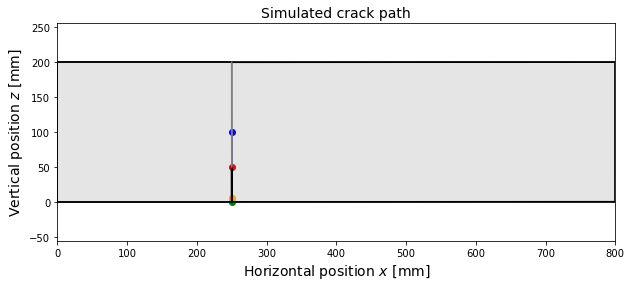

In [70]:
import matplotlib.pylab as plt
fig, ax = plt.subplots(1,1, figsize = (10, 4))
ax.set_ylim(ymin = 0, ymax = ce.sz_bd.H)
ax.set_xlim(xmin = 0.05 * ce.sz_bd.L, xmax = 1.05 * ce.sz_bd.L)
ax.axis('equal')
bd = ce.sz_cp.sz_bd
bd.plot_sz_bd(ax)
ds = ce.crack_tip_orientation.crack_tip_shear_stress.sz_stress_profile.ds
ds.sz_ctr.plot_crack_tip_rotation(ax)
ce.sz_cp.plot_sz0(ax)
ds.plot_sz1(ax)
ds.plot_sz_fill(ax)

In [145]:
%matplotlib widget
import bmcs_utils.api as bu
from bmcs_shear.shear_crack.crack_propagation import CrackPropagation
from bmcs_cross_section.api import ReinfLayer


ce = CrackPropagation(n_seg=150) #150 #35 #70
ce.sz_bd.Rectangle = True
ce.sz_bd.trait_set(H=600, B=250, L=3870)
ce.sz_cp.trait_set(x_00=ce.sz_bd.L * 0.5, n_m = 4)
ce.sz_cp.sz_ctr.L_fps = 80 #80
ce.sz_cp.sz_ctr.trait_set(ell = 2) #2 #9 #4.5

# bl1 = ReinfLayer(name='layer1', z=44, A=ce.sz_bd.smm.A_f, matmod='steel')
# bl1.matmod_.trait_set(E=ce.sz_bd.smm.E_f, f_t=ce.sz_bd.smm.sig_y)
# ce.sz_bd.cross_section_layout.add_layer(bl1)
# ce.sz_bd

In [146]:
ce.run()
ce.interact()

<lambdifygenerated-440>:2: RuntimeWarning: invalid value encountered in sqrt
  return (select([less_equal(w, 0),True], [0,0.25*f_c*s*(-sqrt(2)*sqrt(w/d_a) + 1)*((2.44 - 39.04/f_c)*abs(s/w)**3 + 9.8/f_c)/(w*(s**4*(2.44 - 39.04/f_c)/w**4 + 1))], default=nan))


In [147]:
from bmcs_shear.shear_crack.crack_extension import CrackExtension
cext = CrackExtension()
cext.sz_cp.x_00 = ce.sz_cp.x_t_Ia[0,0]
cext.sz_cp.x_t_Ia[0,:]

array([1935.,    0.])

In [148]:
%%capture
import matplotlib.pylab as plt
import numpy as np
from matplotlib import animation, rc
fig, (ax, ax_F) = plt.subplots(1,2,figsize=(8,3), tight_layout=True)
ds = ce.crack_tip_orientation.crack_tip_shear_stress.sz_stress_profile.ds
sz_cp = ce.sz_cp
x_n_a = sz_cp.x_t_Ia[0,:]
x_Ia = sz_cp.x_t_Ia
n_extend = 10
F_beam = np.array(ce.F_beam)/ 1000
v_beam = np.array(ce.v_n)
v_beam = np.hstack([v_beam, v_beam[-1]*np.ones((n_extend,))])
F_beam = np.hstack([F_beam, F_beam[-1]*np.ones((n_extend,))])
x_Ia = np.vstack([x_Ia, x_Ia[-1,:]*np.ones((n_extend,2))])

ds.plot_sz_fill(ax)
ax_F.set_xlim(xmax=1.04*np.max(v_beam))
ax_F.set_ylim(ymax=1.04*np.max(F_beam))
v_n = v_beam[0]
F_n = F_beam[0]

def plot_crack_step(i):
    global x_n_a, v_n, F_n
    x_n1_a = x_Ia[i,:]
    ax.plot([x_n_a[0],x_n1_a[0]], [x_n_a[1], x_n1_a[1]], '-', color='black')
    ax.set_ylim(ymin=0 ,ymax=600)
    ax.set_xlim(xmin=0 ,xmax=3870)
    ax.set_xlabel('Length of beam [mm]')
    ax.set_ylabel('Height of beam [mm]')
    ax.set_title('Crack propagation')
    ax.axis('equal');
    x_n_a = x_n1_a
    v_n1, F_n1 = v_beam[i], F_beam[i]
    ax_F.plot([v_n, v_n1], [F_n, F_n1], 'o-', color = 'blue')
    ax_F.set_xlabel('Deflection [mm]')
    ax_F.set_ylabel('Load [kN]')
    ax_F.set_title('Load deflection curve')
    v_n, F_n = v_n1, F_n1

In [149]:
def html5_crack_propagate_video():
    n_t = len(x_Ia)
    # call the animator. blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, plot_crack_step,
                                   frames=n_t, interval=200, blit=True, repeat=True, repeat_delay=2000)
    return anim.to_html5_video()

In [150]:
import os.path
home_dir = os.path.expanduser('~')
anim_dir = os.path.join(home_dir, 'generated_animation')
if not os.path.exists(anim_dir):
    os.makedirs(anim_dir)

In [151]:
%%capture
crack_propagate_file = os.path.join(anim_dir, 'crack_propagate_animation.html')
with open(crack_propagate_file,'w') as html_video_file:
    html_video_file.write(html5_crack_propagate_video())

In [152]:
from IPython.display import HTML
html_video_file = open(crack_propagate_file,'r')
HTML(html_video_file.read())